In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from lazypredict.Supervised import LazyRegressor


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   time_to_collect        1000 non-null   int64  
 2   avg_bill_methods       1000 non-null   object 
 3   debtor_volume_handled  1000 non-null   int64  
 4   bill_amount_collected  1000 non-null   int64  
 5   total_actual           1000 non-null   int64  
 6   total_cost             1000 non-null   int64  
 7   success_rate           1000 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


In [3]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [4]:
df.head()

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate
0,0,sms or WA,7,14400000,35700000,277706,40.00
1,11,panggilan,35,79000000,160500000,22382611,49.00
2,4,sms or WA,6,7100000,26700000,205389,27.00
3,29,datang ke tempat,63,782000000,1395000000,482942548,56.00
4,22,datang ke tempat,35,346000000,485500000,151035603,71.00


In [5]:
df["total_cost"].describe()

count        1000.00
mean    139633105.12
std     166600490.67
min         25263.00
25%       1928856.50
50%      62215627.00
75%     247064723.00
max     678041154.00
Name: total_cost, dtype: float64

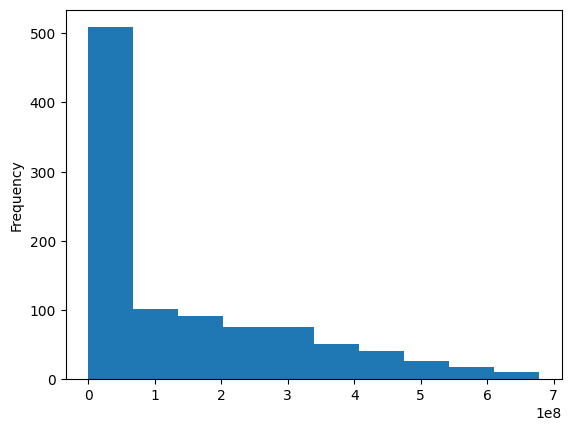

In [6]:
df["total_cost"].plot.hist()
plt.show()

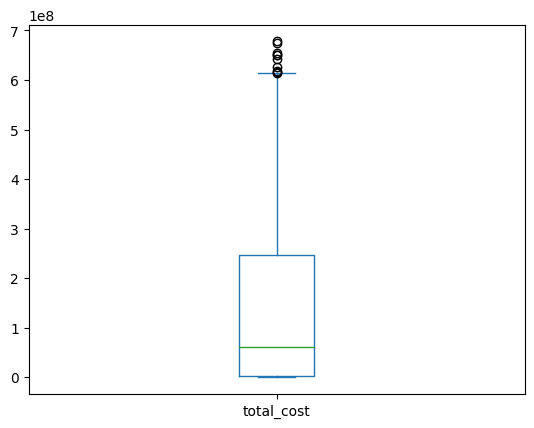

In [7]:
df["total_cost"].plot.box()
plt.show()

In [8]:
Q1 = np.quantile(df["total_cost"], .25)
Q3 = np.quantile(df["total_cost"], .75)

IQR = Q3 - Q1
min_IQR = Q1 - 1.5*IQR
max_IQR = Q3 + 1.5*IQR

low_outlier = [i for i in df["total_cost"] if i < min_IQR]
high_outlier = [i for i in df["total_cost"] if i > max_IQR]
for i in range(len(df)):
    if df.loc[i, "total_cost"] in low_outlier or df.loc[i, "total_cost"] in high_outlier:
        df.drop(i, axis=0, inplace=True)

df.shape
        

(990, 7)

In [9]:
df["total_cost"].describe()

count         990.00
mean    134554330.17
std     159528948.49
min         25263.00
25%       1908808.00
50%      59891791.00
75%     236438599.75
max     614113785.00
Name: total_cost, dtype: float64

In [10]:
df["avg_bill_methods"].value_counts()

avg_bill_methods
datang ke tempat    471
sms or WA           198
panggilan           162
surat panggilan     159
Name: count, dtype: int64

In [11]:
bill_methods = {"sms or WA": 0, "surat panggilan": 1, "panggilan": 2, "datang ke tempat": 3}
columns = {"avg_bill_methods": bill_methods}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]

scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,time_to_collect,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,avg_bill_methods
0,-1.00,-1.26,-0.46,-0.53,-0.25,-0.36,0.00
1,-0.27,-0.08,-0.28,-0.35,-0.16,-0.16,2.00
2,-0.73,-1.31,-0.48,-0.54,-0.25,-0.66,0.00
3,0.93,1.09,1.67,1.42,1.80,0.00,3.00
4,0.47,-0.08,0.46,0.12,0.39,0.34,3.00


In [12]:
X = df2.drop("total_cost", axis=1)
y = df2["total_cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/42 [00:00<?, ?it/s]

100%|██████████| 42/42 [00:05<00:00,  7.14it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 709
[LightGBM] [Info] Number of data points in the train set: 792, number of used features: 6
[LightGBM] [Info] Start training from score 0.296431
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,0.69,0.70,0.39,0.09
RandomForestRegressor,0.68,0.68,0.40,1.08
MLPRegressor,0.67,0.68,0.41,0.93
GradientBoostingRegressor,0.65,0.66,0.42,0.33
ExtraTreesRegressor,0.65,0.66,0.42,0.63
SVR,0.64,0.65,0.43,0.05
NuSVR,0.63,0.64,0.43,0.07
HistGradientBoostingRegressor,0.63,0.64,0.43,0.93
BaggingRegressor,0.62,0.64,0.43,0.28


### Build new data

In [13]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   time_to_collect        1000 non-null   int64  
 2   avg_bill_methods       1000 non-null   object 
 3   debtor_volume_handled  1000 non-null   int64  
 4   bill_amount_collected  1000 non-null   int64  
 5   total_actual           1000 non-null   int64  
 6   total_cost             1000 non-null   int64  
 7   success_rate           1000 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


In [14]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [15]:
bill_methods = [] # metode penagihan
bill_amount_collected = [] # jumlah tagihan yang dikumpulkan
total_actual = [] # Jumlah tagihan minimal yang seharusnya
debt_sum = [] # jumlah debitur yang ditangani
total_cost = [] # biaya untuk pengananan debitur oleh debt kolektor
success_rate = [] # jumlah kesuksesan dalam penagihan
time_to_collect = np.random.randint(0, 5, 200)
time = [i for i in time_to_collect]
for i in range(len(time_to_collect)):
    bill_methods.append("sms or WA")
    debt = np.random.randint(1, 20)
    debt_sum.append(debt)
    total = np.random.choice(np.arange(500000*(debt), 10000000*debt, 100000))
    total_actual.append(total)
    total_cost.append(np.random.randint(10000*debt, 50000*(debt+1)))
    bill = np.random.choice(np.arange(400000*(debt), total_actual[-1]+100000, 100000))
    bill_amount_collected.append(bill)
    number = float(f"{bill/total:.2f}") * 100
    success_rate.append(number)

time_to_collect = np.random.randint(6, 10, 200)
for i in range(len(time_to_collect)):
    time.append(time_to_collect[i])
    bill_methods.append("surat panggilan")
    debt = np.random.randint(20, 40)
    debt_sum.append(debt)
    total = np.random.choice(np.arange(1000000*(debt), 15000000*debt, 500000))
    total_actual.append(total)
    total_cost.append(np.random.randint(50000*debt, 100000*(debt+1)))
    bill = np.random.choice(np.arange(500000*(debt), total_actual[-1]+500000, 500000))
    bill_amount_collected.append(bill)
    number = float(f"{bill/total:.2f}") * 100
    success_rate.append(number)
    

time_to_collect = np.random.randint(11, 15, 200)
for i in range(len(time_to_collect)):
    time.append(time_to_collect[i])
    bill_methods.append("panggilan")
    debt = np.random.randint(30, 50)
    debt_sum.append(debt)
    total = np.random.choice(np.arange(1500000*(debt), 20000000*debt, 1000000))
    total_actual.append(total)
    total_cost.append(np.random.randint(200000*debt, 2000000*(debt+1)))
    bill = np.random.choice(np.arange(1000000*(debt), total_actual[-1]+1000000, 1000000))
    bill_amount_collected.append(bill)
    number = float(f"{bill/total:.2f}") * 100
    success_rate.append(number)

df_kolektor = pd.DataFrame()
df_kolektor["avg_bill_methods"] = bill_methods
df_kolektor["debtor_volume_handled"] = debt_sum
df_kolektor["bill_amount_collected"] = bill_amount_collected
df_kolektor["total_actual"] = total_actual
df_kolektor["total_cost"] = total_cost
df_kolektor["success_rate"] = success_rate
df_kolektor["time_to_collect"] = time

df = pd.concat([df, df_kolektor], ignore_index=True)
df.head()

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate
0,0,sms or WA,7,14400000,35700000,277706,40.00
1,11,panggilan,35,79000000,160500000,22382611,49.00
2,4,sms or WA,6,7100000,26700000,205389,27.00
3,29,datang ke tempat,63,782000000,1395000000,482942548,56.00
4,22,datang ke tempat,35,346000000,485500000,151035603,71.00


In [16]:
df.to_csv("./data/data2.csv")

In [17]:
df.shape

(1600, 7)

### Train again

In [18]:
bill_methods = {"sms or WA": 0, "surat panggilan": 1, "panggilan": 2, "datang ke tempat": 3}
columns = {"avg_bill_methods": bill_methods}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]

scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,time_to_collect,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,avg_bill_methods
0,-0.92,-1.12,-0.43,-0.48,-0.12,-0.39,0
1,0.00,0.04,-0.19,-0.24,0.05,-0.18,2
2,-0.58,-1.17,-0.46,-0.49,-0.12,-0.68,0
3,1.50,1.21,2.47,2.10,3.76,-0.02,3
4,0.92,0.04,0.82,0.38,1.09,0.32,3


In [19]:
X = df2.drop("total_cost", axis=1)
y = df2["total_cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

  2%|▏         | 1/42 [00:00<00:04,  8.87it/s]

100%|██████████| 42/42 [00:07<00:00,  5.59it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 712
[LightGBM] [Info] Number of data points in the train set: 1280, number of used features: 6
[LightGBM] [Info] Start training from score 0.602432


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,0.74,0.75,0.62,0.11
MLPRegressor,0.72,0.73,0.64,1.12
NuSVR,0.69,0.69,0.68,0.17
GradientBoostingRegressor,0.69,0.69,0.69,0.52
ExtraTreesRegressor,0.68,0.69,0.69,0.95
LGBMRegressor,0.68,0.69,0.69,0.13
RandomForestRegressor,0.68,0.69,0.69,1.67
SVR,0.68,0.69,0.69,0.11
HistGradientBoostingRegressor,0.67,0.68,0.70,0.86


### BUild new data 2

In [20]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\data_preparation\EDA\Univariate_bivariate_multivariate\Univariate_Analysis\new_kolektor.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1000 non-null   int64  
 1   time_to_collect        1000 non-null   int64  
 2   avg_bill_methods       1000 non-null   object 
 3   debtor_volume_handled  1000 non-null   int64  
 4   bill_amount_collected  1000 non-null   int64  
 5   total_actual           1000 non-null   int64  
 6   total_cost             1000 non-null   int64  
 7   success_rate           1000 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


In [21]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [22]:
df["avg_bill_methods"].value_counts()

avg_bill_methods
datang ke tempat    481
sms or WA           198
panggilan           162
surat panggilan     159
Name: count, dtype: int64

In [23]:
index = []
a = 0
for i in range(len(df)):
    if df.loc[i, "avg_bill_methods"] == "datang ke tempat":
        a += 1
        if a >= 180:
            index.append(i)

df.drop(index, inplace=True)

In [24]:
df.shape

(698, 7)

### Train again

In [25]:
bill_methods = {"sms or WA": 0, "surat panggilan": 1, "panggilan": 2, "datang ke tempat": 3}
columns = {"avg_bill_methods": bill_methods}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]

scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,time_to_collect,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,avg_bill_methods
0,-0.91,-1.04,-0.39,-0.46,-0.04,-0.39,0.00
1,0.09,0.08,-0.13,-0.19,0.22,-0.17,2.00
2,-0.55,-1.08,-0.42,-0.47,-0.04,-0.71,0.00
3,1.73,1.20,2.69,2.40,5.70,0.00,3.00
4,1.09,0.08,0.94,0.49,1.75,0.37,3.00


In [26]:
X = df2.drop("total_cost", axis=1)
y = df2["total_cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

  2%|▏         | 1/42 [00:00<00:09,  4.27it/s]

100%|██████████| 42/42 [00:05<00:00,  7.60it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 562
[LightGBM] [Info] Number of data points in the train set: 558, number of used features: 6
[LightGBM] [Info] Start training from score 0.871921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.72,0.74,0.99,0.78
KNeighborsRegressor,0.70,0.71,1.03,0.04
GradientBoostingRegressor,0.70,0.71,1.04,0.32
RandomForestRegressor,0.69,0.70,1.06,1.00
BaggingRegressor,0.68,0.69,1.08,0.17
HistGradientBoostingRegressor,0.67,0.69,1.08,0.63
LGBMRegressor,0.67,0.69,1.08,0.09
ExtraTreesRegressor,0.67,0.68,1.08,0.62
NuSVR,0.67,0.68,1.08,0.06
